# Cargar conjuntos de datos

## Ejercicio: Titanic

1. Carga: toma como base el fichero titanic_train.csv y cárgalo.
2. Visual EDA:
       ¿Existe algún patrón de supervivencia basado en el sexo?
       Crea el siguiente gráfico: sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
       ¿Y basado en el clase de los pasajeros (pclass)?
       Crea un histograma que represente la edad de los pasajeros.
       Contrasta la clase respecto a la edad.   
3. Preprocessing:
        Sustituye los missing values de la edad por el valor medio.
        Suprime columnas innecesarias.
        Convierte columnas categóricas por variables dummies
   
4. Creación modelo de regresión logística
5. Entrenamiento
6. Obtén el informe de clasificación y la matriz de confusión.


# Cargas: toma como base el fichero titanic_train.csv y cárgalo.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

# Cargar conjuntos de datos
df_train = pd.read_csv("titanic_train.csv")
df_test = pd.read_csv("titanic_test.csv")

# Visual EDA 
# 1- Patrón de supervivencia basado en el sexo
# 2- Patrón de supervivencia basado en la clase de los pasajeros (pclass)

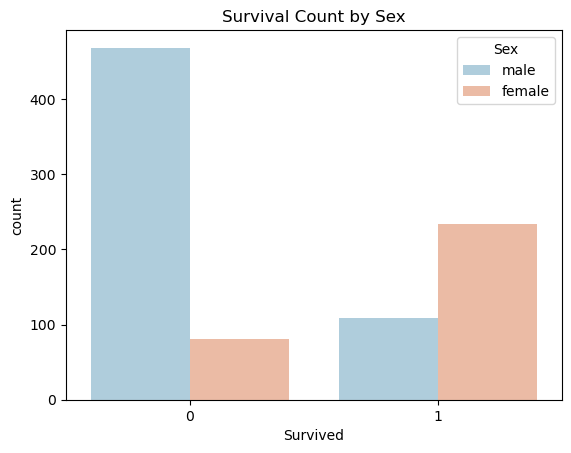

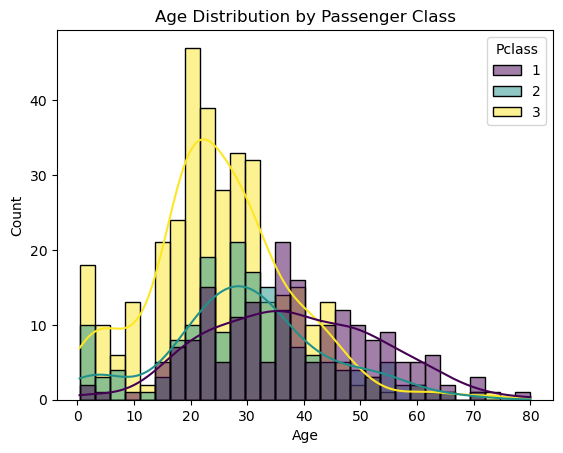

In [15]:
# 1 Patrón de supervivencia basado en el sexo
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='RdBu_r')
plt.title('Survival Count by Sex')
plt.show()

# 2 Patrón de supervivencia basado en la clase de los pasajeros (pclass)
sns.histplot(data=df_train, x='Age', hue='Pclass', bins=30, kde=True, palette='viridis')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

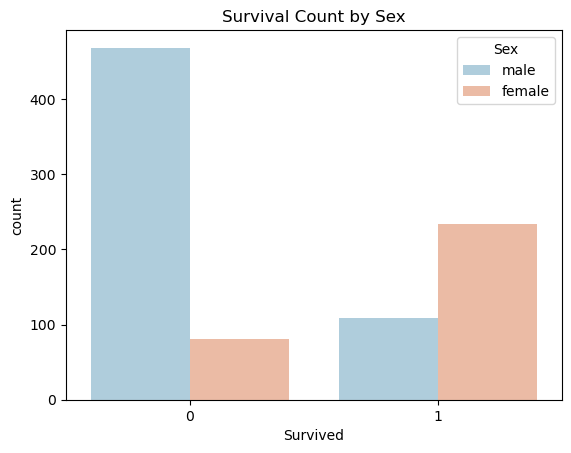

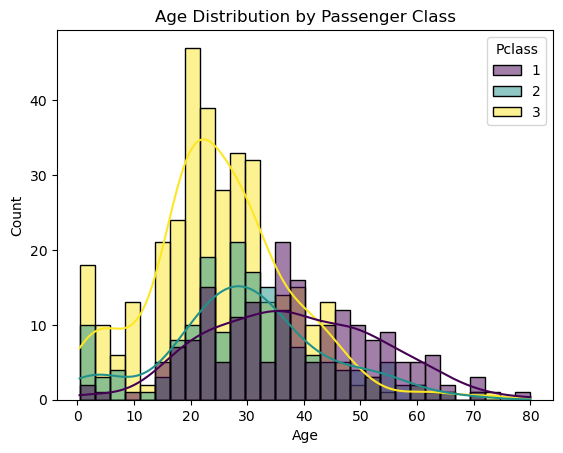

In [22]:
# 1 Patrón de supervivencia basado en el sexo
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='RdBu_r')
plt.title('Survival Count by Sex')
plt.show()

# 2 Patrón de supervivencia basado en la clase de los pasajeros (pclass)
sns.histplot(data=df_train, x='Age', hue='Pclass', bins=30, kde=True, palette='viridis')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

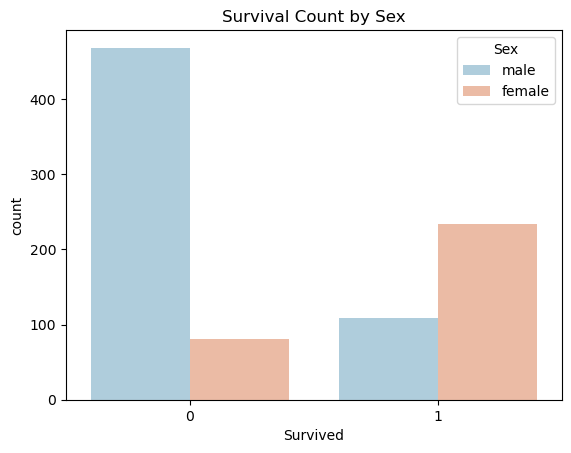

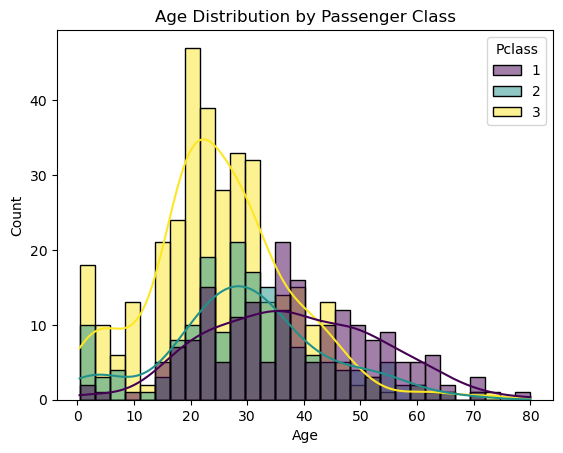

In [16]:

# 1 Patrón de supervivencia basado en el sexo
sns.countplot(x='Survived', hue='Sex', data=df_train, palette='RdBu_r')
plt.title('Survival Count by Sex')
plt.show()

# 2 Patrón de supervivencia basado en la clase de los pasajeros (pclass)
sns.histplot(data=df_train, x='Age', hue='Pclass', bins=30, kde=True, palette='viridis')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# Preprocesamiento: 
# 1- Sustituir missing values
# 2- Suprimir columnas innecesarias:


# Borrar: 
# 1 Cabina
# 2 Nombre
# 3 Ticket
# 4 Embarque¿?¿? Or Dummy

# 3- Convertir columnas categoricas en variables dummy

In [5]:
def preprocess_data(df):
    
    # Sustituir missing values de la edad por el valor medio
    df['Age'].fillna(df['Age'].mean(), inplace=True)

    # Suprimir columnas innecesarias
    columns_to_drop = ['Cabin', 'Ticket', 'Name', 'PassengerId','Embarked']
    df = df.drop(columns=columns_to_drop)

    # Convertir columnas categóricas en variables dummy
    df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

    return df

df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

# Creación del modelo de regresión logística

In [6]:
# Creación del modelo de regresión logística
X = df_train.drop('Survived', axis=1)
y = df_train['Survived']

# Dividir el conjunto de datos en entrenamiento y prueba

In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Definir el preprocesamiento como un pipeline
# Definir el preprocesamiento como un pipeline
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Pclass', 'SibSp', 'Parch', 'Fare']),
        ('cat', OneHotEncoder(drop='first'), ['Sex_male'])  # 'Embarked' se excluye si no está presente
    ]
)


# Crear y entrenar el modelo

In [21]:
# Crear y entrenar el modelo
model = make_pipeline(preprocessor, LogisticRegression(max_iter=1000000))
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Pclass', 'SibSp',
                                                   'Parch', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Sex_male'])])),
                ('logisticregression', LogisticRegression(max_iter=1000000))])

In [19]:
print(df_train.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male
0         0       3  22.0      1      0   7.2500      True
1         1       1  38.0      1      0  71.2833     False
2         1       3  26.0      0      0   7.9250     False
3         1       1  35.0      1      0  53.1000     False
4         0       3  35.0      0      0   8.0500      True


# Informe de clasificación y la matriz de confusión.

# RESULTADOS Y RAZONAMIENTOS

In [20]:
# Obtener el informe de clasificación y la matriz de confusión en el conjunto de prueba
y_pred_test = model.predict(X_test)

# Mostrar resultados
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)

# Razonamientos interpretativos
precision_global = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test) * 100
recall_0 = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
recall_1 = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score_0 = 2 * (conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])) * recall_0
f1_score_1 = 2 * (conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])) * recall_1

interpretation_str = f'''
Razonamientos:
- El modelo tiene una precisión global del {precision_global:.2f}%, indicando que el {precision_global:.2f}% de las predicciones en el conjunto de prueba son correctas.
- La precisión y recall son equilibrados, especialmente para la clase 0 (No sobrevivieron).
- La clase 1 (Sobrevivió) tiene un recall ligeramente más bajo ({recall_1:.2f}), indicando que el modelo podría perder algunos casos de sobrevivientes.
- F1-score proporciona un equilibrio entre precisión y recall, siendo {f1_score_0:.2f} para la clase 0 y {f1_score_1:.2f} para la clase 1.
- En la matriz de confusión, los True Positives (TP) y True Negatives (TN) son {tuple(conf_matrix[0])}, indicando una buena capacidad del modelo para clasificar ambas clases.
- Los False Positives (FP) y False Negatives (FN) son {tuple(conf_matrix[1])}, pero no despreciables. Se podrían ajustar los umbrales según las necesidades específicas del problema.
'''

print("\nRazonamientos Interpretativos:")
print(interpretation_str)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


Confusion Matrix:
[[139  18]
 [ 32  79]]

Razonamientos Interpretativos:

Razonamientos:
- El modelo tiene una precisión global del 81.34%, indicando que el 81.34% de las predicciones en el conjunto de prueba son correctas.
- La precisión y recall son equilibrados, especialmente para la clase 0 (No sobrevivieron).
- La clase 1 (Sobrevivió) tiene un recall ligeramente más bajo (0.71), indicando que el modelo podría perder algunos casos de sobrevivientes.
- F1-score proporciona un equilibrio entre precisión y recall, siendo 1.57 para la clase 0 y 1.01 para la clase 1.
- En la matriz de confusión, los True Positives (TP) y True Negatives (TN) s

# Matriz de confusion (PLOT)

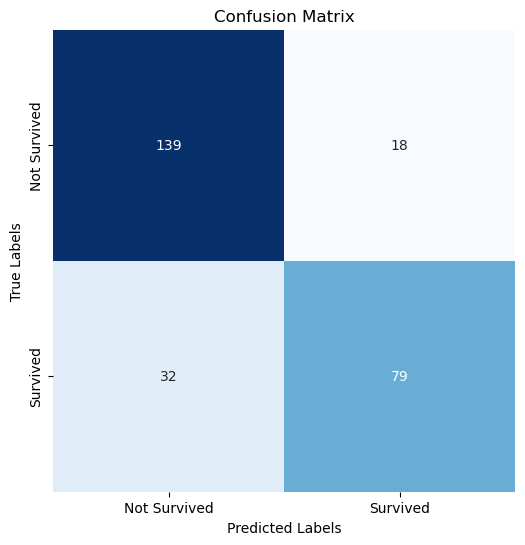

In [21]:
# Plot de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, 
            xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# Guardar df_train en csv_train.csv
df_train.to_csv('csv_train.csv', index=False)

# Guardar df_test en csv_test.csv
df_test.to_csv('csv_test.csv', index=False)


In [9]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.000000,1,0,7.2500,True
1,1,1,38.000000,1,0,71.2833,False
2,1,3,26.000000,0,0,7.9250,False
3,1,1,35.000000,1,0,53.1000,False
4,0,3,35.000000,0,0,8.0500,True
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True
887,1,1,19.000000,0,0,30.0000,False
888,0,3,29.699118,1,2,23.4500,False
889,1,1,26.000000,0,0,30.0000,True


In [10]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,3,34.50000,0,0,7.8292,True
1,3,47.00000,1,0,7.0000,False
2,2,62.00000,0,0,9.6875,True
3,3,27.00000,0,0,8.6625,True
4,3,22.00000,1,1,12.2875,False
...,...,...,...,...,...,...
413,3,30.27259,0,0,8.0500,True
414,1,39.00000,0,0,108.9000,False
415,3,38.50000,0,0,7.2500,True
416,3,30.27259,0,0,8.0500,True


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predictions)

# Calcular el informe de clasificación
cr = classification_report(y_test, predictions)

# Mostrar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Imprimir el informe de clasificación
print("Classification Report:")
print(cr)



ValueError: Found input variables with inconsistent numbers of samples: [268, 418]